In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy
plt.style.use('./../../../MW_viz/matplotlib.mplstyle')

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.linalg import norm

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
with open('../../data/NICO_PICKLE/coeffs_0_dict.pickle', 'rb') as f:
    coeffs_0_dict = pickle.load(f)

In [4]:
def load_profiles(halo):
    Rall = np.loadtxt('../scripts/bins_profiles_{}.txt'.format(halo))
    Dall = np.loadtxt('../scripts/denstiy_profiles_{}.txt'.format(halo))
    Pall = np.loadtxt('../scripts/potential_profiles_{}.txt'.format(halo))
    Mall = np.loadtxt('../scripts/mass_profiles_{}.txt'.format(halo))
    return Rall, Dall, Pall, Mall    

In [5]:
with open('../../data/NICO_PICKLE/times.pickle', 'rb') as f:
    times =  pickle.load(f)
halos = list(times.keys())

In [6]:
halos

['Halo004',
 'Halo113',
 'Halo169',
 'Halo170',
 'Halo222',
 'Halo229',
 'Halo282',
 'Halo327',
 'Halo349',
 'Halo407',
 'Halo659',
 'Halo666',
 'Halo719',
 'Halo747',
 'Halo756',
 'Halo788',
 'Halo975',
 'Halo983']

In [7]:
def enclosed_mass(halo, snap):
    DATAPATH = "../../data/"
    halo = np.load(DATAPATH + "{}/{}_{:03d}.npy".format(halo, halo, snap))
    h = {'position': halo['x'], 'velocity': halo['v']}
    mp = 402830.0 # Msun 
    Menc = len(np.where(norm(h['position'], axis=1) < 150)[0] )
    return Menc*mp

In [8]:
halos_init_snap = {'Halo004':243-25 , 'Halo113':243-26 , 'Halo169':243-31 , 'Halo170':243-28 , 'Halo222':243-24, 'Halo229':240-81, 
                    'Halo282':243-23 , 'Halo327':243-33,  'Halo349':243-36, 'Halo407':243-25, 'Halo659':243-74, 'Halo666':243-27,
                    'Halo719':243-25, 'Halo747':243-27, 'Halo756':243-27, 'Halo788':235-19, 'Halo975':235-18, 'Halo983':235-18 }

Halo004
26 26
Halo113
27 27
Halo169
32 32
Halo170
29 29
Halo222
25 25
Halo229
82 82
Halo282
24 24
Halo327
34 34
Halo349
37 37
Halo407
26 26
Halo659
75 75
Halo666
28 28
Halo719
26 26
Halo747
28 28
Halo756
28 28
Halo788
20 20
Halo975
19 19
Halo983
19 19


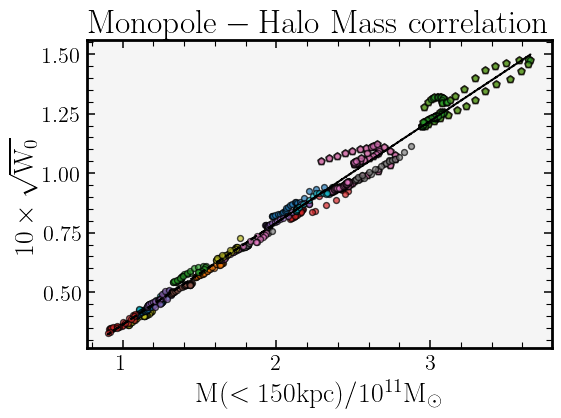

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

nsnaps = np.zeros(18)
menc = np.zeros(18)

i=0
for h in halos:
    print(h)
    
    l0 = coeffs_0_dict[h]
    nsnaps[i] = len(l0)
    menc = np.zeros(int(nsnaps[i]))

    for j in range(int(nsnaps[i])):
        menc[j] = enclosed_mass(h, halos_init_snap[h]+j)
    np.savetxt('monopole_enclosed_mass_{}.txt'.format(h), np.array([np.sqrt(l0), menc]).T)
    print(len(menc), len(l0))
    
    
    if h == 'Halo229':
        ax.scatter(menc/1e11, 10*np.sqrt(l0),  s=32, label=h, edgecolors='k', alpha=0.7, marker='p')
    if h == 'Halo659':
        ax.scatter(menc/1e11, 10*np.sqrt(l0), s=32, label=h, edgecolors='k', alpha=0.7, marker='p')
    
    ax.scatter(menc/1e11, 10*np.sqrt(l0), s=18, label=h, edgecolors='k', alpha=0.7)   
    i+=1

ax.plot(all_m/1e11, 10*func(all_m/1e11, *popt), c='k', lw=1.4, ls='--')
ax.set_xlabel(r'$\rm{M(<150 kpc) / 10^{11} M_{\odot}}$')
ax.set_ylabel(r'$\rm{10\times \sqrt{W_{0}}}$')
ax.set_facecolor('whitesmoke')
plt.title(r'$\rm{Monopole-Halo\ Mass\ correlation}$')

plt.savefig('Monopole_power_vs_enclosed_mass.png', bbox_inches='tight')
plt.savefig('Monopole_power_vs_enclosed_mass.pdf', bbox_inches='tight')

plt.show()

In [25]:
0.025*8

0.2

In [11]:
def func(x, a, b=0):
    return a * x + b

In [12]:
popt, pcov = scipy.optimize.curve_fit(func, all_m/1e11, all_l)

In [13]:
popt

array([ 0.04280698, -0.00647417])

In [14]:
mp = 402830.0 # Msun 

In [15]:
all_l = np.array([])
all_m = np.array([])
for h in halos:
    print(h)
    l0, menc = np.loadtxt('monopole_enclosed_mass_{}.txt'.format(h), unpack=True)
    all_l = np.append(all_l, l0)
    all_m = np.append(all_m, menc)
    

Halo004
Halo113
Halo169
Halo170
Halo222
Halo229
Halo282
Halo327
Halo349
Halo407
Halo659
Halo666
Halo719
Halo747
Halo756
Halo788
Halo975
Halo983


In [16]:
all_l = np.array([])
all_m = np.array([])
for h in halos:
    print(h)
    l0, menc = np.loadtxt('monopole_enclosed_mass_{}.txt'.format(h), unpack=True)
    all_l = np.append(all_l, l0)
    all_m = np.append(all_m, menc)

Halo004
Halo113
Halo169
Halo170
Halo222
Halo229
Halo282
Halo327
Halo349
Halo407
Halo659
Halo666
Halo719
Halo747
Halo756
Halo788
Halo975
Halo983


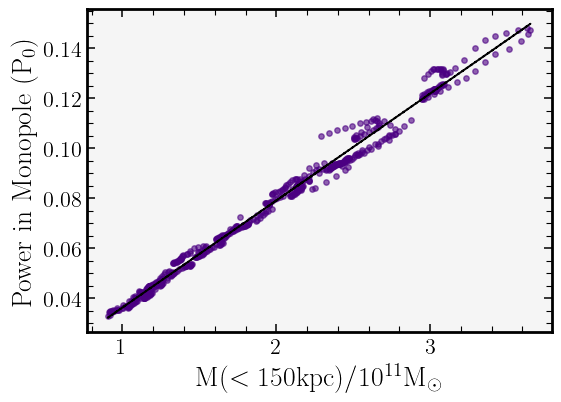

In [126]:
fig, ax = plt.subplots(1, 1)
ax.scatter(all_m/1e11, all_l, c='indigo', alpha=0.6, s=15 )
ax.plot(all_m/1e11, func(all_m/1e11, *popt), c='k', lw=1.4, ls='--')
ax.set_xlabel(r'$\rm{M(<150 kpc) / 10^{11} M_{\odot}}$')
ax.set_ylabel(r'$\rm{Power\ in\ Monopole\ (P_{0})}$')
#ax.plot([0, 0.4], [0.0, 0.2], c='k')
#ax.set_xlim(0.5, 4)
#ax.set_ylim(0.5, 4)
#fig.set_facecolor('whitesmoke') 
ax.set_facecolor('whitesmoke')
plt.savefig('Monopole_power_vs_enclosed_mass.png', bbox_inches='tight')
plt.savefig('Monopole_power_vs_enclosed_mass.pdf', bbox_inches='tight')
plt.show()

In [7]:
h['position']

array([[-9.36943340e+00,  9.63384628e-01,  4.84804964e+00],
       [-7.23717880e+00, -1.52445483e+00,  2.24720144e+00],
       [ 5.60421228e-01, -1.92102635e+00,  3.24982964e-02],
       ...,
       [-1.25125256e+01,  2.72803950e+00, -2.96576881e+01],
       [ 3.38982010e+01,  3.45266953e+01, -5.98995972e+01],
       [-2.81882812e+02, -1.00842285e+02,  2.53094620e+02]], dtype=float32)

In [27]:
P_all_mean.shape[

18

0.12652366621

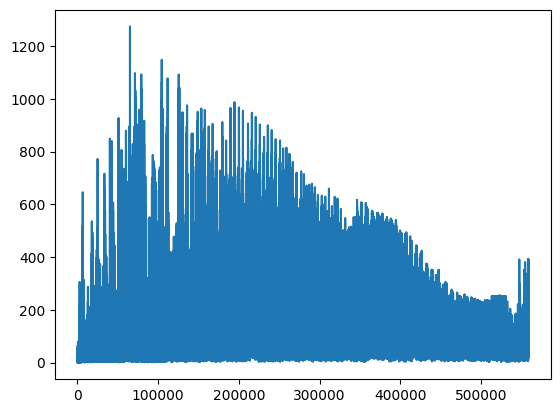

In [8]:
plt.plot(norm(h['position'], axis=1))